In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Oct  4 14:33:21 2019

@author: Theo
"""


import numpy as np
from openpiv import windef
from openpiv.test import test_process 
from openpiv import preprocess
import pathlib
import os
import matplotlib.pyplot as plt

frame_a, frame_b = test_process.create_pair(image_size=256)
shift_u, shift_v, threshold = test_process.shift_u, test_process.shift_v, \
                              test_process.threshold

# this test are created only to test the displacement evaluation of the
# function the validation methods are not tested here ant therefore
# are disabled.

settings = windef.Settings()
settings.windowsizes = (64,)
settings.overlap = (32,)
settings.num_iterations = 1
settings.correlation_method = 'circular'
settings.sig2noise_method = 'peak2peak'
settings.subpixel_method = 'gaussian'
settings.sig2noise_mask = 2


# circular cross correlation
def test_first_pass_circ():
    """ test of the first pass """
    x, y, u, v, s2n = windef.first_pass(
        frame_a,
        frame_b,
        settings
    )
    print("\n", x, y, u, v, s2n)
    assert np.mean(np.abs(u - shift_u)) < threshold
    assert np.mean(np.abs(v - shift_v)) < threshold


def test_multi_pass_circ():
    """ test fot the multipass """
    settings.windowsizes = (64, 64, 16)
    settings.overlap = (32, 32, 8)
    settings.num_iterations = 2
    settings.interpolation_order = 3
    # ettings.show_all_plots = True

    x, y, u, v, s2n = windef.first_pass(
        frame_a,
        frame_b,
        settings,
    )
    print("first pass\n")
    print("\n", x, y, u, v, s2n)
    assert np.allclose(u, shift_u, atol = threshold)
    assert np.allclose(v, shift_v, atol = threshold)

    if settings.image_mask:
        image_mask = np.logical_and(mask_a, mask_b)
        mask_coords = preprocess.mask_coordinates(image_mask)
        # mark those points on the grid of PIV inside the mask
        grid_mask = preprocess.prepare_mask_on_grid(x,y,mask_coords)

        # mask the velocity
        u = np.ma.masked_array(u, mask=grid_mask)
        v = np.ma.masked_array(v, mask=grid_mask)
    else:
        mask_coords = []
        u = np.ma.masked_array(u, mask=np.ma.nomask)
        v = np.ma.masked_array(v, mask=np.ma.nomask)

    for i in range(1,settings.num_iterations):
        x, y, u, v, s2n, _ = windef.multipass_img_deform(
            frame_a,
            frame_b,
            i,
            x,
            y,
            u,
            v,
            settings
        )

    print(f"Pass {i}\n")
    print(x)
    print(y)
    print(u) 
    print(v)
    print(s2n)
    assert np.mean(np.abs(u - shift_u)) < threshold
    assert np.mean(np.abs(v - shift_v)) < threshold
    # the second condition is to check if the multipass is done.
    # It need's a little numerical inaccuracy.


# linear cross correlation
def test_first_pass_lin():
    """ test of the first pass """
    settings.correlation_method = 'linear'

    x, y, u, v, s2n = windef.first_pass(
        frame_a,
        frame_b,
        settings,
    )
    print("\n", x, y, u, v, s2n)
    assert np.mean(np.abs(u - shift_u)) < threshold
    assert np.mean(np.abs(v - shift_v)) < threshold


def test_invert_and_piv():
    """ Test windef.piv with invert option """

    settings = windef.Settings()
    'Data related settings'
    # Folder with the images to process
    settings.filepath_images = '../examples/test1'
    settings.save_path = '.'
    # Root name of the output Folder for Result Files
    settings.save_folder_suffix = 'test'
    # Format and Image Sequence
    settings.frame_pattern_a = 'exp1_001_a.bmp'
    settings.frame_pattern_b = 'exp1_001_b.bmp'

    settings.num_iterations = 1
    settings.show_plot = False
    settings.scale_plot = 100
    settings.show_all_plots = True
    settings.invert = True

    windef.piv(settings)


def test_multi_pass_lin():
    """ test fot the multipass """
    settings.windowsizes = (64, 32, 16)
    settings.overlap = (32, 16, 8)
    settings.num_iterations = 1
    settings.sig2noise_validate = True
    settings.correlation_method = 'linear'
    settings.normalized_correlation = True
    settings.sig2noise_method = 'peak2peak'
    settings.sig2noise_threshold = 1.0
    

    x, y, u, v, s2n = windef.first_pass(
        frame_a,
        frame_b,
        settings,
    )

    print("\n", x, y, u, v, s2n)
    assert np.mean(np.abs(u - shift_u)) < threshold
    assert np.mean(np.abs(v - shift_v)) < threshold


    mask_coords = []
    u = np.ma.masked_array(u, mask=np.ma.nomask)
    v = np.ma.masked_array(v, mask=np.ma.nomask)

    for i in range(1, settings.num_iterations):
        x, y, u, v, s2n, _ = windef.multipass_img_deform(
            frame_a,
            frame_b,
            i,
            x,
            y,
            u,
            v,
            settings,
        )
        print(f"Iteration {i}")
        print("\n", x, y, u, v, s2n)
        assert np.allclose(u, shift_u, atol=threshold)
        assert np.allclose(v, shift_v, atol=threshold)

    # the second condition is to check if the multipass is done.
    # It need's a little numerical inaccuracy.


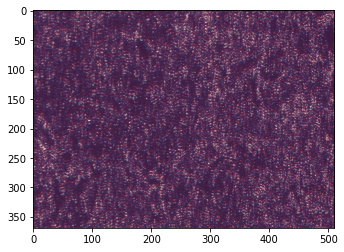

global filter invalidated 0 vectors
std filter invalidated 0 vectors
median filter invalidated 0 vectors
s2n filter invalidated 2 vectors


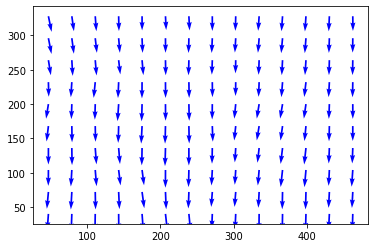

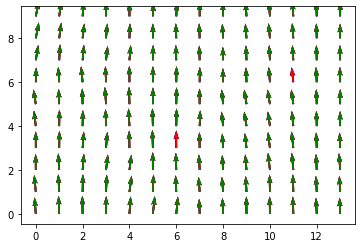

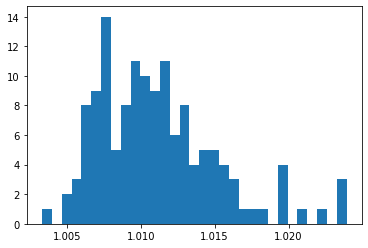

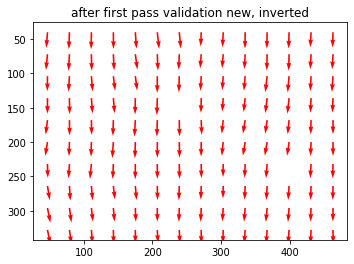

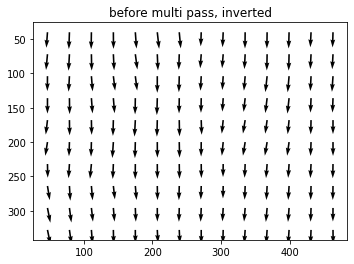

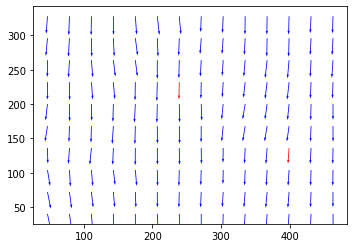

Image Pair 1


In [2]:
test_invert_and_piv()

In [3]:
x, y, u, v, s2n = windef.first_pass(
    frame_a,
    frame_b,
    settings,
)

print("\n", x, y, u, v, s2n)


 [[ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]
 [ 32.  64.  96. 128. 160. 192. 224.]] [[ 32.  32.  32.  32.  32.  32.  32.]
 [ 64.  64.  64.  64.  64.  64.  64.]
 [ 96.  96.  96.  96.  96.  96.  96.]
 [128. 128. 128. 128. 128. 128. 128.]
 [160. 160. 160. 160. 160. 160. 160.]
 [192. 192. 192. 192. 192. 192. 192.]
 [224. 224. 224. 224. 224. 224. 224.]] [[-3.49862881 -3.50059474 -3.48990023 -3.50026419 -3.49750189 -3.48957393
  -3.49547336]
 [-3.49375537 -3.50801416 -3.49650647 -3.49246707 -3.51510533 -3.49937067
  -3.50055887]
 [-3.48960421 -3.49146739 -3.49404569 -3.48004246 -3.49741237 -3.50083999
  -3.49292156]
 [-3.47965001 -3.48724558 -3.49102106 -3.46812307 -3.47309044 -3.49802041
  -3.48973121]
 [-3.48151988 -3.49275911 -3.49218827 -3.48824348 -3.49341814 -3.49482647
  -3.49003793]
 [-3.50193527 -3.49

In [4]:
from openpiv.validation import sig2noise_val

u, v, mask_s2n = sig2noise_val(
            u, v, s2n,
            threshold=settings.sig2noise_threshold
        )

In [5]:
print(mask_s2n)

[[False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False  True False]
 [False False False False False False  True]
 [False  True False False False  True False]
 [False False False False False  True False]]


In [6]:
from openpiv.pyprocess import extended_search_area_piv, get_field_shape, get_coordinates

u, v, s2n = extended_search_area_piv(
    frame_a,
    frame_b,
    window_size=settings.windowsizes[0],
    overlap=settings.overlap[0],
    search_area_size=settings.windowsizes[0],
    width=settings.sig2noise_mask,
    subpixel_method=settings.subpixel_method,
    sig2noise_method=settings.sig2noise_method,
    correlation_method=settings.correlation_method,
    normalized_correlation=settings.normalized_correlation
)

shapes = np.array(get_field_shape(frame_a.shape,
                                  settings.windowsizes[0],
                                  settings.overlap[0]))
u = u.reshape(shapes)
v = v.reshape(shapes)
s2n = s2n.reshape(shapes)

x, y = get_coordinates(frame_a.shape,
                       settings.windowsizes[0],
                       settings.overlap[0])

# return x, y, u, v, s2n

In [7]:
print(s2n)

[[1.76904732 1.7615304  1.78494297 1.78619225 1.77631584 1.75159551
  1.77228788]
 [1.79752456 1.82329033 1.81599021 1.78323591 1.79168425 1.80730536
  1.7740164 ]
 [1.78238332 1.80101185 1.82113584 1.78847207 1.80944678 1.78578067
  1.79987776]
 [1.81176242 1.80475634 1.80999371 1.80939257 1.85962984 0.
  1.79335239]
 [1.81577004 1.79307026 1.78687924 1.7827285  1.72712077 1.74209199
  0.        ]
 [1.79541823 0.         1.81955556 1.77999033 1.77245315 0.
  1.79131478]
 [1.7484297  1.77486834 1.78487343 1.77281592 1.76410571 0.
  1.83148463]]


In [8]:
sum(mask_s2n.flatten())

5

In [9]:
vars(settings)

{'filepath_images': '.',
 'save_path': './res',
 'save_folder_suffix': 'Test_4',
 'frame_pattern_a': 'exp1_001_a.bmp',
 'frame_pattern_b': 'exp1_001_b.bmp',
 'ROI': 'full',
 'dynamic_masking_method': 'None',
 'dynamic_masking_threshold': 0.005,
 'dynamic_masking_filter_size': 7,
 'correlation_method': 'circular',
 'normalized_correlation': False,
 'windowsizes': (64,),
 'overlap': (32,),
 'num_iterations': 1,
 'subpixel_method': 'gaussian',
 'deformation_method': 'symmetric',
 'interpolation_order': 3,
 'scaling_factor': 1,
 'dt': 1,
 'sig2noise_method': 'peak2peak',
 'sig2noise_mask': 2,
 'validation_first_pass': True,
 'MinMax_U_disp': (-30, 30),
 'MinMax_V_disp': (-30, 30),
 'std_threshold': 10,
 'median_threshold': 3,
 'median_size': 1,
 'sig2noise_threshold': 1.0,
 'sig2noise_validate': True,
 'replace_vectors': True,
 'smoothn': True,
 'smoothn_p': 0.05,
 'filter_method': 'localmean',
 'max_filter_iteration': 4,
 'filter_kernel_size': 2,
 'save_plot': True,
 'show_plot': True,
 '